## Adaptive Exponential Integrate and Fire Model

Import useful libraries

In [57]:
import functions as fn
import numpy as np
from scipy.signal import chirp
import matplotlib.pyplot as plt

ImportError: cannot import name 'LinearNDInterpolator'

Define simulation parameters

In [27]:
Sim_period = 20000
Sim_fs   = 100

Sim_dt   = 1/Sim_fs
Sim_t    = np.arange(0,Sim_period,Sim_dt)

In [ ]:
plt.plot(Sim_t)

Neuron Parameters

In [28]:
C     = 130     # pF - membrane capacitance
gL    = 1      # nS - leak conductance
EL    = -70.6   # mV - 
VT    = -50.6   # mV - 
dT    = 2       # mV - 
tauw  = 300     # ms - adaptation time-constant
a     = 30       # nS - subthreshold oscillation parameter
b     = 80.5    # pA - spike-triggered adaptation constants
vpeak = 20      # mV

taum = C/gL

v = np.ones(Sim_t.shape) * EL
w = np.zeros(Sim_t.shape)

In [29]:
print(a/gL)
print(taum/tauw)
print(taum/(4*tauw) * (1 - tauw/taum) ** 2)
# print()

30.0
0.43333333333333335
0.1852564102564102


Stimulation parameters

In [52]:
I_stim = 10

# I = I_stim * np.ones(t.shape)  # pA

# sin + chirp
I1 = fn.gen_sin(freq=1,
                time_points=Sim_t)
I2 = fn.gen_sin(freq=1.001,
                time_points=Sim_t)

I3, freq = fn.gen_chirp(Chirp_init_freq=1, 
                         Chirp_init_time=0, 
                         Chirp_end_freq=1.01, 
                         Chirp_end_time=Sim_t[-1], 
                         time_points=Sim_t)
I = I_stim * (I1 + I3)

# Chirp stimulation
out, freq = fn.gen_chirp(Chirp_init_freq=.001, 
                         Chirp_init_time=0, 
                         Chirp_end_freq=.02, 
                         Chirp_end_time=Sim_t[-1], 
                         time_points=Sim_t)

# I      = I_stim * out  # pA

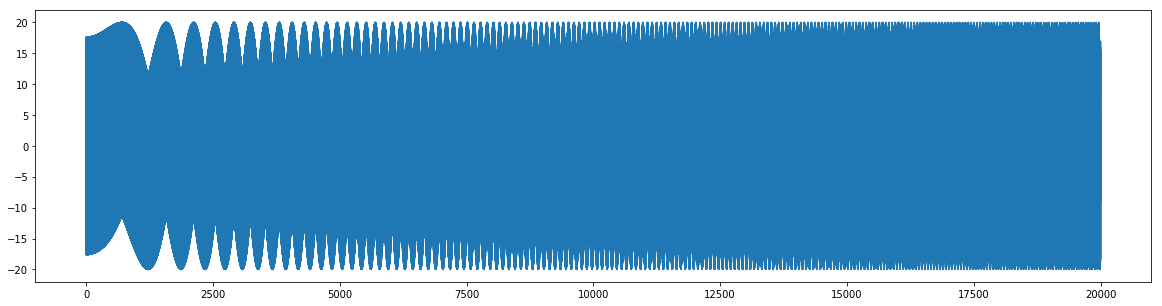

In [53]:
plt.figure(figsize=(20,5))
plt.plot(Sim_t, I)

In [32]:
for i in range(Sim_t.shape[0]-1):
    
    f = -gL * (v[i] - EL) + gL * dT * np.exp((v[i] - VT)/dT)
    dvdt = (f - w[i] + I[i]) / C
    v[i+1] = v[i] + dvdt  * Sim_dt
    
    dwdt = (a * (v[i] - EL) - w[i]) / tauw
    w[i+1] = w[i] + dwdt * Sim_dt
    
    if v[i+1] > vpeak:
        
        v[i] = vpeak
        
        v[i+1] = EL        # phasic spiking and post-inhibitory rebound
#         v(i+1) = VT + 5  # tonic bursting
#         v(i+1) = VT + 4  # phasic bursting
        
        w[i+1] = w[i+1] + b

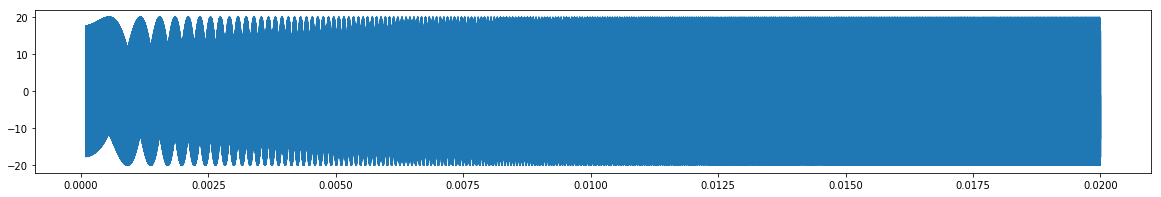

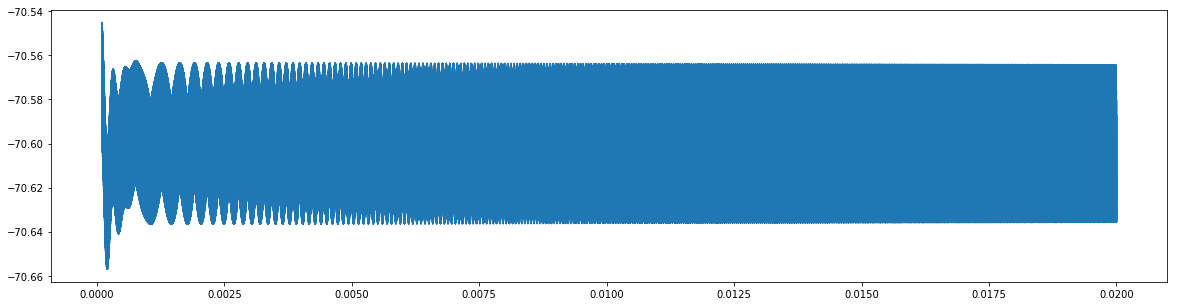

In [33]:
plt.figure(figsize=(20,3))
plt.plot(freq, I)
plt.show()

plt.figure(figsize=(20,5))
plt.plot(freq, v)
plt.show()

## Save figures for paper

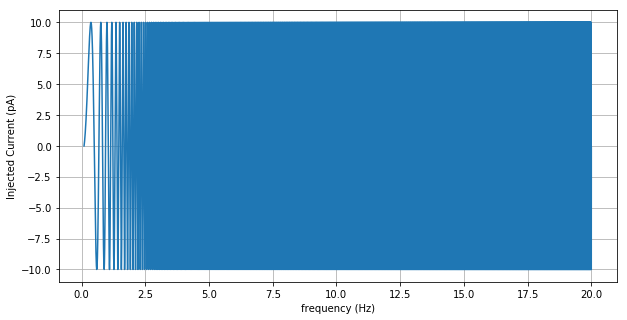

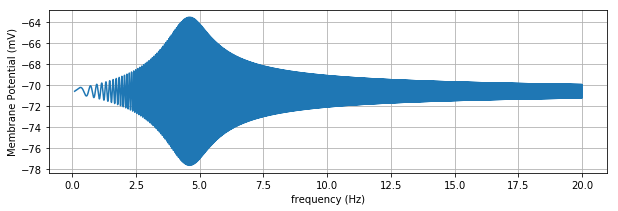

In [29]:
plt.figure(figsize=(10,5))
plt.plot(freq * 1000, I)
plt.xlabel('frequency (Hz)')
plt.ylabel('Injected Current (pA)')
plt.grid()
plt.savefig('D:\TUM\Semester 2 - Holidays\Research project\Project\Erratum\Figures\Paper Figures\First Draft\ZAP\InputZAP.png')
plt.show()

plt.figure(figsize=(10,3))
plt.xlabel('frequency (Hz)')
plt.ylabel('Membrane Potential (mV)')
plt.plot(freq * 1000, v)
plt.grid()
plt.savefig('D:\TUM\Semester 2 - Holidays\Research project\Project\Erratum\Figures\Paper Figures\First Draft\ZAP\AdExpZAP.png')
plt.show()

In [12]:
plt.savefig?

Signature: plt.savefig(*args, **kwargs)
Docstring:
Save the current figure.

Call signature::

  savefig(fname, dpi=None, facecolor='w', edgecolor='w',
          orientation='portrait', papertype=None, format=None,
          transparent=False, bbox_inches=None, pad_inches=0.1,
          frameon=None)

The output formats available depend on the backend being used.

Parameters
----------

fname : str or file-like object
    A string containing a path to a filename, or a Python
    file-like object, or possibly some backend-dependent object
    such as :class:`~matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is *None* and *fname* is a string, the output
    format is deduced from the extension of the filename. If
    the filename has no extension, the value of the rc parameter
    ``savefig.format`` is used.

    If *fname* is not a string, remember to specify *format* to
    ensure that the correct backend is used.

Other Parameters
----------------

dpi : [ *None* | scalar >